In [5]:
import pandas as pd
import ipaddress
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Task 1 -- Load the dataset
AlienVault_IP = pd.read_csv("AlienVault_IP_reputation.csv")
AlienVault_IP

,Unnamed: 0,IP,Reliability,Risk,Type,Country,Locale,Coords
0,0,222.76.212.189,4,2,Scanning Host,cn,Xiamen,"24.4797992706,118.08190155"
1,1,222.76.212.185,4,2,Scanning Host,cn,Xiamen,"24.4797992706,118.08190155"
2,2,222.76.212.186,4,2,Scanning Host,cn,Xiamen,"24.4797992706,118.08190155"
3,3,5.34.246.67,6,3,Spamming,us,NaN,"38.0,-97.0"
4,4,178.94.97.176,4,5,Scanning Host,ua,Merefa,"49.8230018616,36.0507011414"
...,...,...,...,...,...,...,...,...
9995,9995,86.35.30.70,4,3,Scanning Host,ro,Caransebes,"45.4166984558,22.2166996002"
9996,9996,86.35.30.71,4,3,Scanning Host,ro,Caransebes,"45.4166984558,22.2166996002"
9997,9997,86.35.30.72,4,3,Scanning Host,ro,Caransebes,"45.4166984558,22.2166996002"
9998,9998,86.35.30.73,4,3,Scanning Host,ro,Caransebes,"45.4166984558,22.2166996002"


In [4]:
#Task 1 --show stats/Frequency
AlienVault_noCoord = AlienVault_IP.drop('Coords', axis=1)
AlienVault_noCoord = AlienVault_noCoord.drop(columns=['Unnamed: 0'], axis=1)
AlienVault_noCoord.describe(include='all')

,IP,Reliability,Risk,Type,Country,Locale
count,10000,10000.000000,10000.000000,10000,9659,7137
unique,10000,NaN,NaN,17,73,310
top,222.76.212.189,NaN,NaN,Scanning Host,us,Jinan
freq,1,NaN,NaN,9038,2194,323
mean,NaN,4.004800,2.545900,NaN,NaN,NaN
std,NaN,0.920033,0.776372,NaN,NaN,NaN
min,NaN,1.000000,1.000000,NaN,NaN,NaN
25%,NaN,4.000000,2.000000,NaN,NaN,NaN
50%,NaN,4.000000,2.000000,NaN,NaN,NaN
75%,NaN,4.000000,3.000000,NaN,NaN,NaN


In [20]:
#Task 2
#There are 256x256x256 = 16,777,216 unique IP adresses in a 24-bit subnet
list1 = []
def ip_is_in_cidr(ip_add, cidr):
    for ci in cidr:
        IP_add_list= [str(ip) for ip in ipaddress.IPv4Network(cidr)]
        if ip_add in IP_add_list:
            return True
        else:
            return False

for ip in AlienVault_IP['IP']:
    if ip_is_in_cidr(ip, "5.34.246.0/24"):
        list1.append(ip)

for ip in AlienVault_IP['IP']:
    if ip_is_in_cidr(ip, "222.76.212.0/24"):
        list1.append(ip)
list1

['5.34.246.67',
 '5.34.246.131',
 '5.34.246.135',
 '222.76.212.189',
 '222.76.212.185',
 '222.76.212.186',
 '222.76.212.173',
 '222.76.212.172',
 '222.76.212.171',
 '222.76.212.200',
 '222.76.212.197',
 '222.76.212.196',
 '222.76.212.202',
 '222.76.212.201',
 '222.76.212.12',
 '222.76.212.9',
 '222.76.212.27',
 '222.76.212.20',
 '222.76.212.25',
 '222.76.212.179',
 '222.76.212.194',
 '222.76.212.199',
 '222.76.212.13',
 '222.76.212.24',
 '222.76.212.198']

In [60]:
#Task 3 - the average risk score is 2.5459
sum1 = 0
list2 = []
for ip in AlienVault_IP['IP']:
    if ip_is_in_cidr(ip, "222.76.212.0/24"):
        list2 = AlienVault_IP['Risk']
for x in list2:
    sum1 += x
avg_risk_score = sum1 / list2.size
print(avg_risk_score)

2.5459


LeveneResult(statistic=26.37446470701699, pvalue=2.9362641983948366e-07)

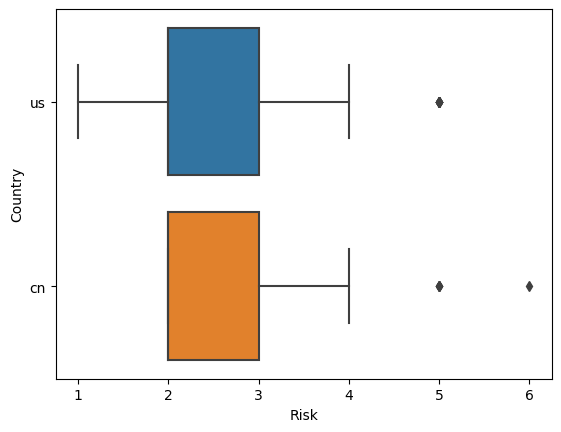

In [30]:
#Task 4 used sfu.ca for formatting and testing the sets for variation
import seaborn as sns
from scipy import stats
import statsmodels.stats.api as sms

AlienVault_IP_us = AlienVault_IP[AlienVault_IP['Country'] == 'us']
AlienVault_IP_cn = AlienVault_IP[AlienVault_IP['Country'] == 'cn']
AlienVault_IP_us_cn = pd.concat([AlienVault_IP_us, AlienVault_IP_cn])
sns.boxplot(y=AlienVault_IP_us_cn['Country'], x=AlienVault_IP_us_cn['Risk'])

us_risk = AlienVault_IP[AlienVault_IP['Country'] == "us"]['Risk']
cn_risk = AlienVault_IP[AlienVault_IP['Country'] == "cn"]['Risk']

stats.levene(us_risk, cn_risk)


In [138]:
#Task 5-8864 IP addresses
AlienVault_IP_pk = AlienVault_IP[AlienVault_IP['Country'] == 'pk']
AlienVault_IP_mx = AlienVault_IP[AlienVault_IP['Country'] == 'mx']
AlienVault_IP_gb = AlienVault_IP[AlienVault_IP['Country'] == 'gb']
AlienVault_IP_ru = AlienVault_IP[AlienVault_IP['Country'] == 'ru']
AlienVault_IP_ua = AlienVault_IP[AlienVault_IP['Country'] == 'ua']
ip_count = AlienVault_IP_gb.size + AlienVault_IP_pk.size + AlienVault_IP_mx.size + AlienVault_IP_ua.size + AlienVault_IP_ru.size
ip_count

8864

LeveneResult(statistic=318.0172368148136, pvalue=1.0798792141573716e-68)

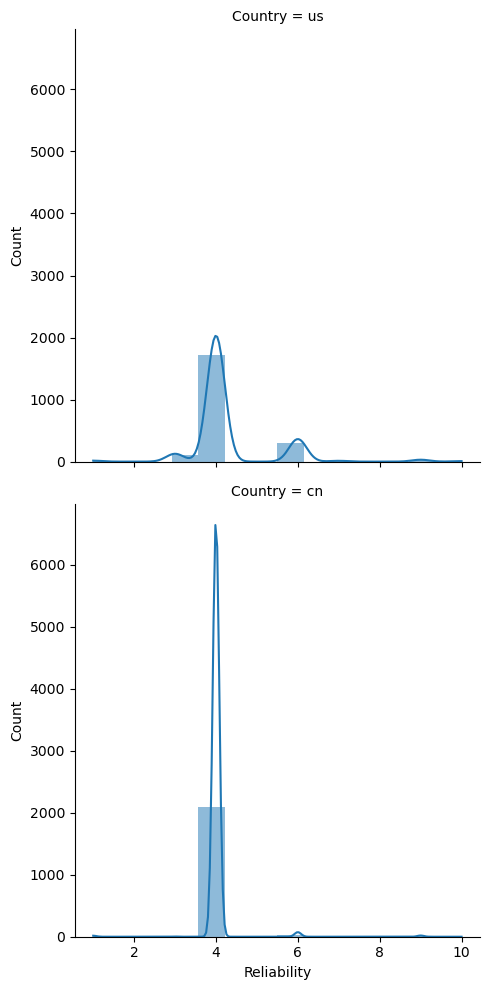

In [143]:
#Task 6
AlienVault_IP_us_rs = AlienVault_IP[AlienVault_IP['Country'] == 'us']
AlienVault_IP_ru_rs = AlienVault_IP[AlienVault_IP['Country'] == 'cn']
AlienVault_IP_us_ru_rs = pd.concat([AlienVault_IP_us, AlienVault_IP_cn])
sns.displot(x=AlienVault_IP_us_cn['Reliability'], row=AlienVault_IP_us_cn['Country'], linewidth=0, kde=True)

us_risk = AlienVault_IP[AlienVault_IP['Country'] == "us"]['Reliability']
cn_risk = AlienVault_IP[AlienVault_IP['Country'] == "cn"]['Reliability']

stats.levene(us_risk, cn_risk)

In [1]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!pip install gmaps
!jupyter nbextension enable --py --sys-prefix gmaps

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


In [16]:
%matplotlib inline

In [23]:
#Task 7
import gmaps
AlienVault_IP_au = AlienVault_IP[AlienVault_IP['Country'] == 'au']
AlienVault_IP_au_coord = AlienVault_IP_au['Coords'].str.strip('[]').str.split(',').rename('loc')
loc1 = (-27.0, 133.0)
loc2 = (-38.0, 145.050003052)
gmap.configure(api_key='AI...')
fig1 = gmaps.figure(center=loc1, zoom_level=12)
fig1
fig2 = gmaps.figure(center=loc2, zoom_level=12)
fig2

Figure(layout=FigureLayout(height='420px'))

In [43]:
#Task 8- US- 1)scanning host 2)spamming 3)malwre ip DE-1)scanning host
#2)malware domain 3)malware ip CN-1)Scanning host 2)malicious host 
#3)malware domain
us = AlienVault_IP[AlienVault_IP['Country'] == 'us']
de = AlienVault_IP[AlienVault_IP['Country'] == 'de']
cn = AlienVault_IP[AlienVault_IP['Country'] == 'cn']

print(us['Type'].value_counts(),
de['Type'].value_counts(),
cn['Type'].value_counts())

Scanning Host                    1758
Spamming                          267
Malware IP                         73
Malware Domain                     55
Malicious Host                     27
C&C                                 9
Malicious Host;Scanning Host        2
Malware Domain;Malicious Host       1
Malware Domain;Malware IP           1
C&C;Malware Domain                  1
Name: Type, dtype: int64 Scanning Host                          381
Malware Domain                          20
Malware IP                              14
Spamming                                 5
Malicious Host                           3
Malicious Host;Scanning Host             2
Malware Domain;Malware IP                1
Malware distribution;Malicious Host      1
C&C                                      1
Name: Type, dtype: int64 Scanning Host                   2053
Malicious Host                    37
Malware Domain                    26
Malware IP                         4
Malware Domain;Scanning Host       

In [55]:
#Task 9
AlienCountry = AlienVault_IP.groupby(['Country']).mean()  
AlienCountry.sort_values(by=['Risk'], ascending=False).head(5)

,Unnamed: 0,Reliability,Risk
Country,,,
ma,8358.0,4.0,6.0
sa,5612.0,4.0,5.0
az,4372.0,4.0,5.0
by,3009.0,6.0,5.0
ae,8484.0,4.0,4.5


In [56]:
#Task 10
AlienCountry = AlienVault_IP.groupby(['Country']).mean()  
AlienCountry.sort_values(by=['Reliability'], ascending=False).head(5)

,Unnamed: 0,Reliability,Risk
Country,,,
fi,4359.0,9.0,2.0
hu,5814.0,6.5,2.0
by,3009.0,6.0,5.0
vg,8479.0,6.0,3.0
cy,2119.5,6.0,2.5
